# Metode FDTD untuk Persamaan Schrodinger 2D

Persamaan Schrodinger pada waktu imajiner, gunakan satuan $\hbar = m = 1 $, untuk sebuah partikel pada potensial kotak 2D, $x \in [0,1], y \in [0, 1]$ yaitu
$$ \frac{\partial \psi}{\partial \tau} = \frac{1}{2}\left[\frac{\partial^2 \psi}{\partial x^2} + \frac{\partial^2 \psi}{\partial y^2}\right] + V(x) \psi$$

Setelah menggunakan metode numerik, kita dapatkan persamaan eksplisit $\Delta x = \Delta y$
$$ \psi^{n+1}_{i,j} = \alpha_{i,j} \psi^n_{i,j} + \beta_{i,j} \left[\frac{\Delta \tau}{2(\Delta x)^2}[\psi^n_{i-1,j} - 2\psi^n_{i,j} + \psi^n_{i+1,j}] + \frac{\Delta \tau}{2(\Delta y)^2}[\psi^n_{i,j-1} - 2\psi^n_{i,j} + \psi^n_{i,j+1}] \right] $$

$$ \psi^{n+1}_{i,j} = \alpha_{i,j} \psi^n_{i,j} + \beta_{i,j} \frac{\Delta \tau}{2(\Delta x)^2}\left[[\psi^n_{i-1,j} - 2\psi^n_{i,j} + \psi^n_{i+1,j} + \psi^n_{i,j-1} - 2\psi^n_{i,j} + \psi^n_{i,j+1}] \right] $$

$$ \psi^{n+1}_{i,j} = \alpha_{i,j} \psi^n_{i,j} + \beta_{i,j} \frac{\Delta \tau}{2(\Delta x)^2}\left[[\psi^n_{i-1,j} + \psi^n_{i+1,j} + \psi^n_{i,j-1} + \psi^n_{i,j+1} - 4\psi^n_{i,j} \right] $$

$$ \alpha_i = \frac{1 - \Delta t V_i/2}{1 + \Delta t V_i/2} $$
$$ \beta_i = \frac{1}{1 + \Delta t V_i/2} $$


In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import random as rnd
from matplotlib import cm 

In [2]:
NX = 50
NY = 50
LX = 5.0
LY = 5.0
dx = LX/NX
dt = 0.5*(dx**2/2)
x = np.arange(NX+1)*dx
y = np.arange(NY+1)*dx

cc = dt/(2*dx**2)
psi = np.zeros((NX+1, NY+1))
psinew = np.zeros((NX+1, NY+1))
v = np.zeros((NX+1, NY+1))
# alpha_i
ca = np.zeros((NX+1, NY+1))
# beta_i
cb = np.zeros((NX+1, NY+1))

In [3]:
# psi awal, gunakan bilangan random
for i in range(1,NX):
    for j in range(1,NY):
        psi[i,j] = rnd.random()

# syarat batas psi = 0 di keliling daerah
# dengan cara tidak di update, tetap nol

# V[i,j] potensial 2D
# harmonik v = (1/2)k(x^2 + y^2) = (1/2) [m omega^2] (x^2 + y^2)
# gunakan satuan m = 1 satuan
# omega = 1 satuan
# satuan energi dalam hbar omega
x0 = LX/2
y0 = LY/2
for i in range(0,NX+1):
    for j in range(0,NY+1):
        v[i,j] = 0.5*(x[i] - x0)**2 + 0.5*(y[j] - y0)**2

# koefisien alpha dan beta
for i in range(1,NX):
    for j in range(1,NY):
        ca[i,j] = (1 - 0.5*dt*v[i,j])/(1 + 0.5*dt*v[i,j])
        cb[i,j] = 1.0/(1 + 0.5*dt*v[i,j])

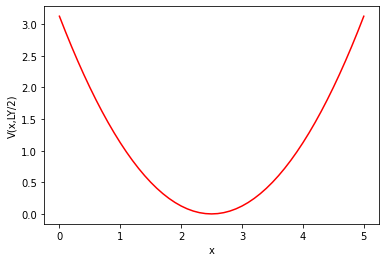

In [4]:
# Plot potensial
plt.plot(x,v[:,NY//2],'-r')
plt.xlabel('x')
plt.ylabel('V(x,LY/2)')
plt.show()

In [5]:
# lakukan 5000 iterasi
for n in range(5000):
    # hitung psi_new[i]
    for i in range(1,NX):
        for j in range(1,NY):
            temp = psi[i-1, j] + psi[i+1, j] + psi[i,j-1] + psi[i,j+1] - 4*psi[i,j]
            psinew[i,j] = ca[i,j]*psi[i,j] + cb[i,j]*cc*temp
    
    # simpan untuk iterasi berikutnya
    for i in range(1,NX):
        for j in range(1,NY):
            psi[i,j] = psinew[i,j]
            

In [6]:
# Normalisasi
temp = 0    
for i in range(1, NX):
    for j in range(1, NY):
        temp += psi[i,j]**2
temp2 = np.sqrt(dx*dx*temp)

for i in range(1, NX):
    for j in range(1, NY):
        psi[i,j] = psi[i,j]/temp2

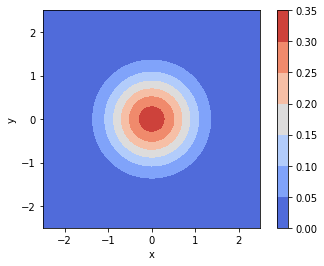

In [7]:
X, Y = np.meshgrid(x-x0, y-y0, sparse =False, indexing = 'ij')

#plot hasil
plt.contourf(X, Y, psi**2, cmap = cm.coolwarm)
plt.xlabel('x')
plt.ylabel('y')
plt.colorbar()
plt.gca().set_aspect('equal')
plt.show()

In [8]:
# hitung energi untuk harmonik (eksak) E = 1.0
energi = 0
for i in range(1, NX):
    for j in range(1, NY):
        d2psi = -0.5*(psi[i-1,j] - 2*psi[i,j] + psi[i+1,j])/(dx**2)
        d2psi += -0.5*(psi[i, j-1] - 2*psi[i,j] + psi[i,j+1])/(dx**2)
        energi += psi[i,j]*d2psi + v[i,j]*psi[i,j]**2
energi *= dx*dx
print(energi)

1.009320121015624
